In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [47]:
df=pd.read_csv("titanic.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [48]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [49]:
df['relatives']=df['SibSp']+df['Parch']

df.loc[df['relatives']>0,'relatives']=1
df.loc[df['relatives']==0,'relatives']=0

df['relatives'].value_counts()

relatives
0    537
1    354
Name: count, dtype: int64

In [50]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.dropna(subset=['Embarked'],inplace=True)

In [51]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,0,3,male,22.0,1,0,7.25,S,1


In [52]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
relatives    0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

df['Sex']=label_encoder.fit_transform(df['Sex'])
print(label_encoder.classes_)

df['Embarked']=label_encoder.fit_transform(df['Embarked'])
print(label_encoder.classes_)

['female' 'male']
['C' 'Q' 'S']


In [54]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,0,3,1,22.000000,1,0,7.2500,2,1
1,1,1,0,38.000000,1,0,71.2833,0,1
2,1,3,0,26.000000,0,0,7.9250,2,0
3,1,1,0,35.000000,1,0,53.1000,2,1
4,0,3,1,35.000000,0,0,8.0500,2,0
5,0,3,1,29.699118,0,0,8.4583,1,0
6,0,1,1,54.000000,0,0,51.8625,2,0
7,0,3,1,2.000000,3,1,21.0750,2,1
8,1,3,0,27.000000,0,2,11.1333,2,1
9,1,2,0,14.000000,1,0,30.0708,0,1


In [55]:
x=df[['Pclass','Sex','Age','Embarked','relatives','SibSp','Parch']]
y=df[['Survived']]

In [56]:
y.value_counts()

Survived
0           549
1           340
Name: count, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)
y.value_counts()

Survived
0           549
1           549
Name: count, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [60]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred=model.predict(x_test)

from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       113
           1       0.83      0.80      0.82       107

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



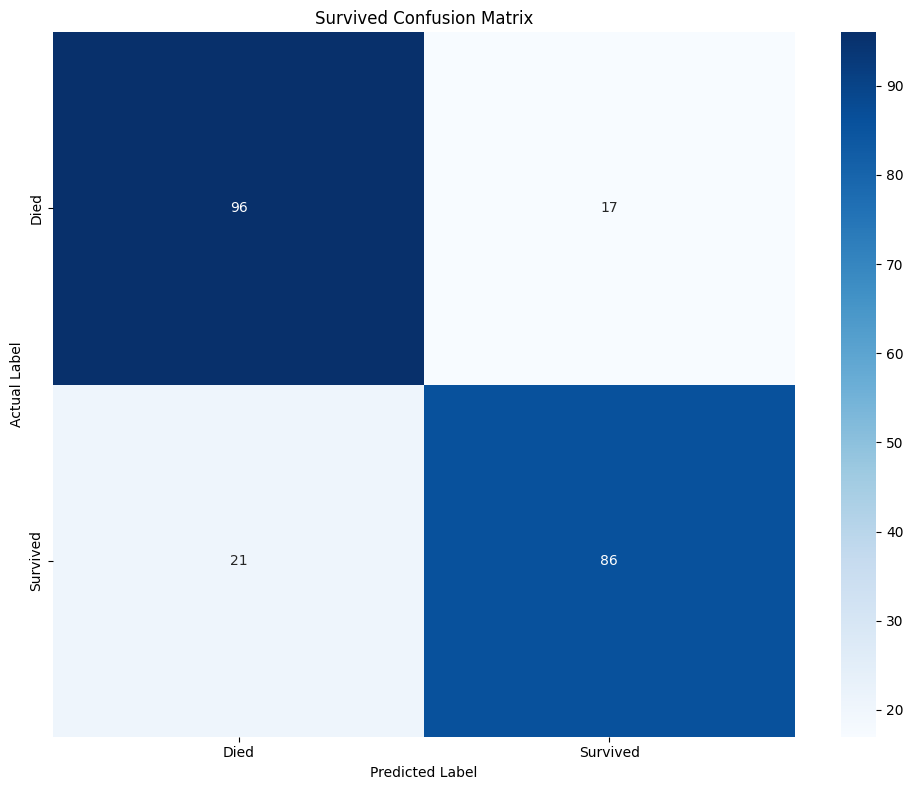

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm_model = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm_model, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Died', 'Survived'], 
            yticklabels=['Died', 'Survived'])

# Set titles and labels
plt.title("Survived Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Adjust layout and show
plt.tight_layout()
plt.show()
